# Bootstrapping

### Principles of bootstrapping
Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

 The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.
 

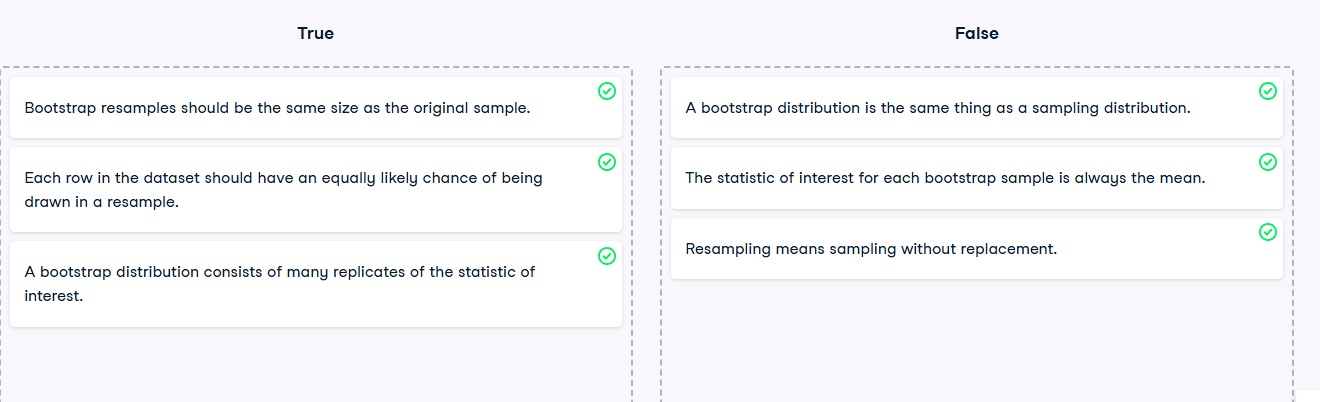

 ### The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

 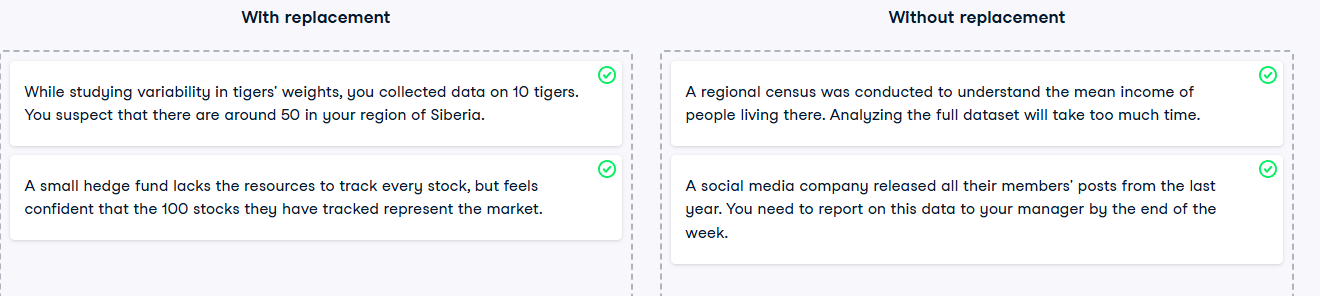

# Generating a bootstrap distribution
The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.


* Generate a single bootstrap resample from spotify_sample.
* Calculate the mean of the danceability column of spotify_1_resample using numpy.
* Replicate the expression provided 1000 times.
* Create a bootstrap distribution by drawing a histogram of mean_danceability_1000.

In [1]:
import pandas as pd

spotify_population = pd.read_csv("/kaggle/input/spotify-dataset/data/data.csv")
spotify_population.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [2]:
spotify_sample = spotify_population.sample(n=1000, random_state=42) 

# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
print(spotify_1_resample)

        valence  year  acousticness                        artists  \
42800     0.242  1948       0.92000   ['Shamshed Begum', 'Mukesh']   
110836    0.565  1950       0.86000                  ['Manna Dey']   
139107    0.590  2011       0.00643                   ['Puscifer']   
43530     0.445  1951       0.95100            ['Carlos Di Sarli']   
148938    0.744  1986       0.06130               ['Warren Zevon']   
...         ...   ...           ...                            ...   
59410     0.128  1941       0.00637                 ['Local Oafs']   
108401    0.174  2018       0.07070  ['Anderson .Paak', 'J. Cole']   
133612    0.928  1984       0.13400               ['Alison Moyet']   
11840     0.930  1981       0.04070                  ['Joe Walsh']   
143987    0.416  1959       0.85900            ['Sammy Davis Jr.']   

        danceability  duration_ms  energy  explicit                      id  \
42800         0.3070       192787   0.432         0  0nOOZoBeSdvHH0PRzVF3T9   
1

In [3]:
import numpy as np

# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5401923000000001


In [4]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

[0.5310118, 0.5481804, 0.5392829, 0.5348099999999999, 0.5424364, 0.5420264000000001, 0.5448236999999999, 0.5319834999999999, 0.5453421999999999, 0.5495880999999999, 0.5413284, 0.5403492, 0.5439516999999999, 0.5480696, 0.5379175, 0.5447637999999999, 0.5461226, 0.5346894999999999, 0.5411691000000001, 0.5313132, 0.536186, 0.5408819000000001, 0.5441182, 0.5360876, 0.5348130000000001, 0.5522669000000001, 0.5368723999999999, 0.5365411, 0.5378354, 0.5373715, 0.5444220000000001, 0.5583319, 0.5413956, 0.5476422, 0.5417773, 0.5296208, 0.5485423, 0.5341382, 0.5528036, 0.5387989, 0.5350516, 0.5397415, 0.550076, 0.5475893000000001, 0.5413966, 0.5502985, 0.5500934999999999, 0.5339655, 0.5399522, 0.5451563, 0.5537115, 0.5521734, 0.5469002000000001, 0.5450922, 0.5477073, 0.5440364, 0.5489953000000001, 0.5385752, 0.5366561000000001, 0.5423068000000001, 0.5440246999999999, 0.5442149, 0.5497858000000001, 0.5351657, 0.5334405000000001, 0.5509272, 0.54425, 0.5416200999999999, 0.5524560000000001, 0.5384512,

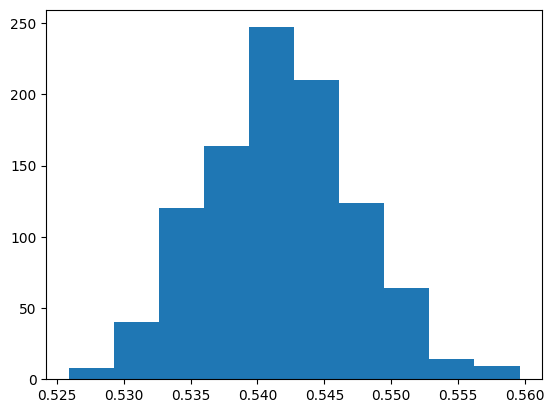

In [5]:
import matplotlib.pyplot as plt

# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

Beautiful bootstrapping! From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

# Sampling distribution vs. bootstrap distribution
The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.


* Generate a sampling distribution of 2000 replicates using a for loop.
* Sample 500 rows of the population without replacement and calculate the mean popularity.
* Sample 500 rows of the sample with replacement and cal

In [6]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    # Sample 500 rows and calculate the mean popularity
    sample_mean = spotify_population.sample(n=500, replace=False)['popularity'].mean()
    mean_popularity_2000_samp.append(sample_mean)


# Print the sampling distribution results
print(mean_popularity_2000_samp)

[31.772, 32.46, 31.468, 30.422, 32.854, 31.498, 32.188, 32.018, 32.32, 32.774, 31.982, 30.2, 30.958, 30.062, 30.308, 31.364, 31.064, 30.742, 30.954, 31.782, 31.436, 31.324, 30.506, 31.224, 30.904, 30.24, 30.396, 31.442, 31.33, 32.598, 29.546, 32.144, 32.686, 31.862, 30.128, 33.318, 29.798, 32.89, 31.536, 33.344, 31.056, 31.624, 29.592, 31.118, 30.204, 30.792, 31.288, 30.95, 33.354, 30.232, 30.414, 31.866, 30.236, 30.384, 32.026, 34.092, 33.104, 32.554, 30.094, 30.814, 31.306, 32.016, 31.204, 31.292, 30.94, 32.348, 29.99, 32.162, 32.258, 31.768, 30.934, 29.898, 32.394, 30.644, 31.022, 30.586, 31.636, 32.806, 30.612, 32.114, 31.502, 32.23, 31.746, 31.542, 32.134, 30.9, 31.266, 30.328, 30.048, 31.43, 33.612, 31.61, 30.028, 32.212, 30.568, 29.594, 31.338, 31.172, 31.434, 32.762, 31.042, 30.916, 30.91, 33.31, 31.158, 31.286, 33.018, 30.8, 31.628, 31.02, 31.84, 31.394, 33.754, 31.972, 31.138, 30.15, 32.466, 32.106, 31.142, 31.012, 30.29, 30.146, 30.588, 28.704, 32.648, 32.744, 30.386, 31.986

In [7]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    # Resample 500 rows and calculate the mean popularity
    mean_popularity_2000_boot.append(
        spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[30.794, 32.534, 32.328, 32.094, 30.964, 31.484, 31.498, 31.476, 31.758, 32.792, 29.746, 32.344, 32.702, 32.022, 30.008, 31.65, 30.2, 31.41, 28.882, 31.182, 30.564, 31.644, 33.024, 31.16, 32.766, 31.676, 31.58, 31.002, 31.232, 33.382, 29.462, 31.24, 32.504, 32.258, 30.48, 32.226, 30.216, 31.918, 31.044, 31.91, 31.17, 29.804, 31.03, 33.232, 29.522, 31.494, 32.476, 33.376, 30.71, 31.762, 32.844, 32.178, 30.496, 30.81, 30.16, 31.246, 31.142, 30.984, 31.7, 31.458, 30.696, 30.008, 32.348, 31.512, 32.478, 31.94, 33.322, 33.132, 30.87, 30.898, 31.808, 30.958, 31.708, 32.186, 30.742, 32.384, 31.656, 31.674, 32.522, 31.424, 31.778, 30.49, 30.69, 31.618, 31.456, 31.242, 32.806, 32.008, 31.712, 30.75, 31.062, 32.34, 31.26, 31.886, 30.366, 32.428, 30.164, 29.932, 31.11, 31.262, 32.898, 31.104, 31.418, 31.766, 30.05, 32.048, 31.086, 30.624, 32.808, 31.324, 28.668, 32.466, 31.06, 30.308, 31.504, 31.034, 31.08, 32.386, 31.464, 32.052, 31.74, 32.076, 30.326, 31.708, 30.21, 32.386, 30.692, 29.144, 31.1

### Compare sampling and bootstrap means
To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.



* Population: from spotify_population, take the mean of popularity.
* Sample: from spotify_sample, take the mean of popularity.
* Sampling distribution: from sampling_distribution, take its mean.
* Bootstrap distribution: from bootstrap_distribution, take its mean.

In [8]:
# Calculate the population mean popularity
pop_mean = np.mean(spotify_population['popularity'])

# Calculate the original sample mean popularity
samp_mean = np.mean(spotify_sample['popularity'])

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[31.431794342906365, 31.426, 31.443669000000003, 31.401385]


# Compare sampling and bootstrap standard deviations
In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

Recall that the sample size is 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.


* Calculate the standard deviation of popularity in 4 ways.

* Population: from spotify_population, take the standard deviation of popularity.
* Original sample: from spotify_sample, take the standard deviation of popularity.
* Sampling distribution: from sampling_distribution, take its standard deviation and multiply by the square root of the sample size (5000).
* Bootstrap distribution: from bootstrap_distribution, take its standard deviation and multiply by the square root of the sample size.

In [10]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std(ddof=1)

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(mean_popularity_2000_samp, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_2000_boot, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[21.82655118890549, 21.70455278534004, 68.79917750676823, 68.12380924146699]


The calculation from the bootstrap distribution is the best estimate of the population standard deviation.

This is an important property of the bootstrap distribution. When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.

## Calculating confidence intervals
You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

spotify_population, spotify_sample, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases, and norm has been loaded from scipy.stats.


* Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the 0.025 quantile as lower_quant and the 0.975 quantile as upper_quant.
* Generate a 95% confidence interval using the standard error method from the bootstrap distribution.

* Calculate point_estimate as the mean of bootstrap_distribution, and standard_error as the standard deviation of bootstrap_distribution.
* Calculate lower_se as the 0.025 quantile of an inv. CDF from a normal distribution with mean point_estimate and standard deviation standard_error.
* Calculate upper_se as the 0.975 quantile of that same inv. CDF.

In [12]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(mean_popularity_2000_boot, 0.025)
upper_quant = np.quantile(mean_popularity_2000_boot, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(29.49535, 33.262299999999996)


In [14]:
from scipy.stats import norm

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(mean_popularity_2000_boot)
standard_error = np.std(mean_popularity_2000_boot, ddof = 1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(29.51312404485966, 33.289645955140344)
